In [1]:
import matplotlib.pyplot as plt
import json
from Bio import SeqIO
import subprocess
import random
import os


In [2]:
with open("../data/species_list.json") as json_file:
    available_species_list = json.load(json_file)
len(available_species_list)


38478

In [18]:
def get_aggreagtion_results(file_path):
    temp_file = "temp.txt"
    # file_path = "../large_data/example.fasta"
    tango_file_path = "../large_data/tango2_3_1.linux64/tango_x86_64_release"
    records = (r for r in SeqIO.parse(file_path, "fasta"))

    aggregation_scores = list()
    for r in records:
        with open(temp_file, "w") as f:
            f.write(f"tempseq N N 7 298 0.1 {r.seq}\n")

        result = subprocess.run(
            [
                tango_file_path,
                f"-inputfile={temp_file}",
            ],
            capture_output=True,
        )

        with open("tempseq.txt", "r") as f:
            f.readline()
            aggregation_scores.append([float(line.split("\t")[5]) for line in f])
    results = [sum(x) / len(x) for x in aggregation_scores]
    os.system("rm temp_aggregation*")
    return results


In [20]:
number_of_random_species = 5000


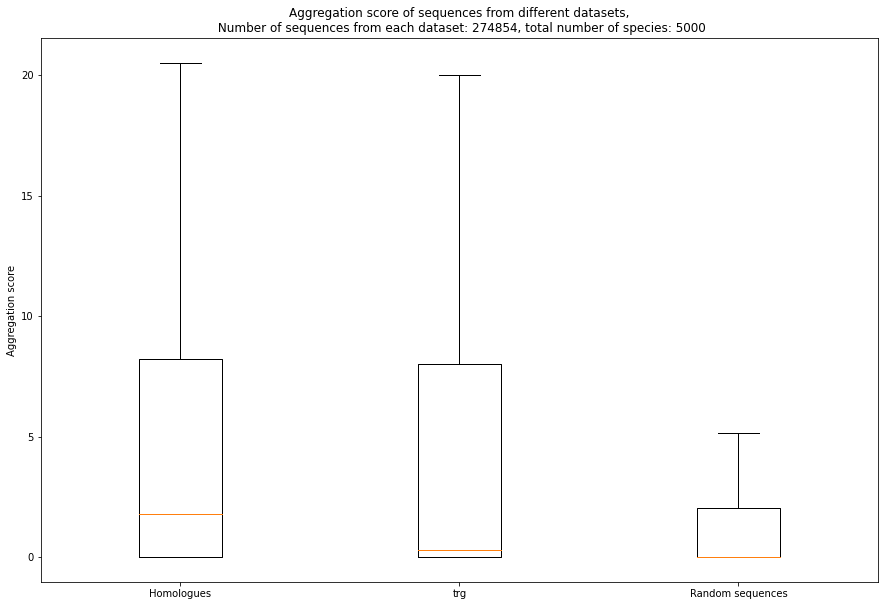

In [21]:
with open("../data/species_list.json") as json_file:
    available_species_list = json.load(json_file)

orf_results = list()
trg_results = list()
hom_results = list()
for i in range(number_of_random_species):

    species = random.sample(available_species_list, 1)[0]

    available_species_list.remove(species)
    file_path = f"../large_data/protein_faa_reps/bacteria/{species}"
    orf_results += get_aggreagtion_results(file_path + "_orfs.fasta")
    trg_results += get_aggreagtion_results(file_path + "_clusters.fasta")
    hom_results += get_aggreagtion_results(file_path + "_homologues.fasta")

assert len(orf_results) == len(trg_results) == len(hom_results)
plt.gcf().set_size_inches(15, 10)
plt.title(
    f"Aggregation score of sequences from different datasets,\n Number of sequences from each dataset: {len(orf_results)}, total number of species: {number_of_random_species}"
)
plt.ylabel("Aggregation score")
plt.boxplot(x=[hom_results, trg_results, orf_results], showfliers=False)
plt.xticks([1, 2, 3], ["Homologues", "trg", "Random sequences"])
plt.show()
